In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

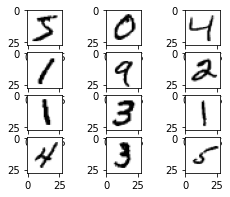

In [3]:
plt.figure(figsize = (4,3))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
plt.show()

In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
#Keras modelimizi oluşturalım
input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [13]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

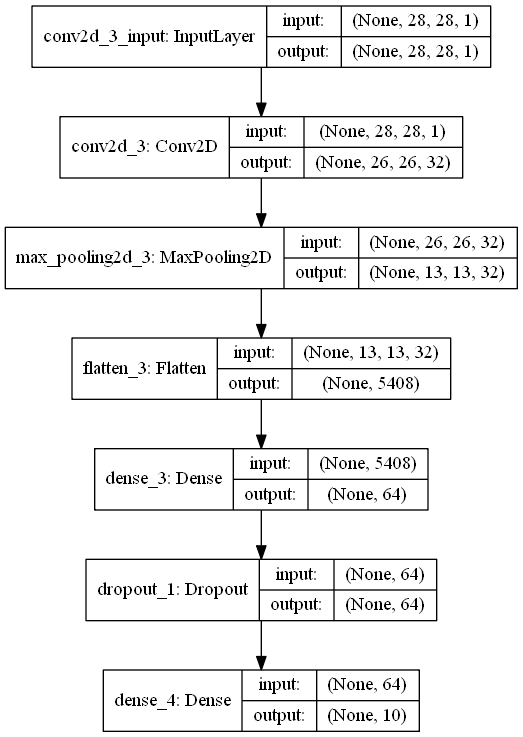

In [14]:
tf.keras.utils.plot_model(model, "aigroup9-mnist.png", show_shapes = True, show_layer_names = True)

In [16]:
history = model.fit(
    X_train,
    y_train,
    verbose = 2,
    epochs = 5,
    batch_size = 16,
    validation_split = 0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 39s - loss: 0.0928 - accuracy: 0.9704 - val_loss: 0.0653 - val_accuracy: 0.9822
Epoch 2/5
 - 38s - loss: 0.0870 - accuracy: 0.9724 - val_loss: 0.0677 - val_accuracy: 0.9817
Epoch 3/5
 - 37s - loss: 0.0789 - accuracy: 0.9734 - val_loss: 0.0731 - val_accuracy: 0.9820
Epoch 4/5
 - 37s - loss: 0.0739 - accuracy: 0.9755 - val_loss: 0.0719 - val_accuracy: 0.9822
Epoch 5/5
 - 36s - loss: 0.0687 - accuracy: 0.9775 - val_loss: 0.0749 - val_accuracy: 0.9823


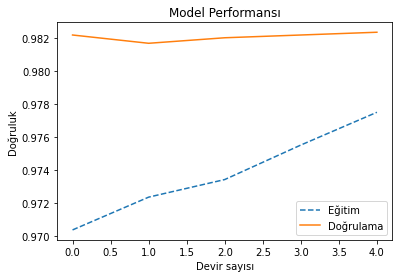

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], '--')
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir sayısı")
plt.legend(['Eğitim', 'Doğrulama'], loc = 'lower right')
plt.show()

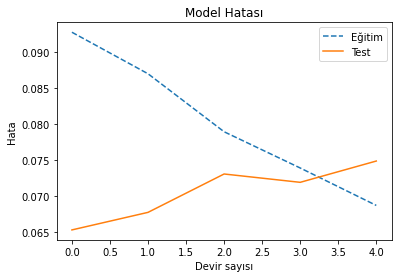

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], '--')
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir sayısı")
plt.legend(['Eğitim', 'Test'], loc = 'upper right')
plt.show()

In [19]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin test performansı : %.2f%%" % (performans[1]*100))

Modelin test performansı : 98.12%


In [20]:
#Recurrent Neural Network

In [21]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.preprocessing import sequence

In [22]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [23]:
print(X_train.shape)

(25000,)


In [24]:
maxlen = 500
X_train = sequence.pad_sequences(X_train, maxlen = 500)
X_test = sequence.pad_sequences(X_test, maxlen = 500)
print("Eğitim kümesinin son hali : \n", X_train)

Eğitim kümesinin son hali : 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [25]:
X_train.shape

(25000, 500)

In [26]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(SimpleRNN(64))
model.add(Dense(1, activation = "sigmoid"))

In [27]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ['accuracy']
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


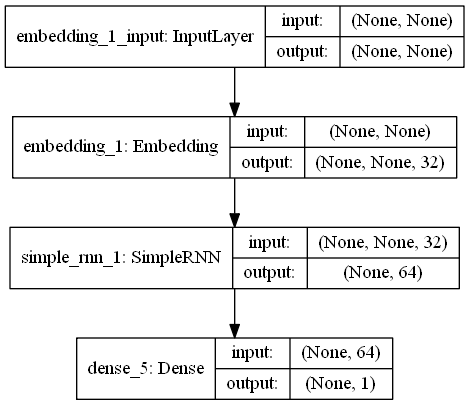

In [28]:
tf.keras.utils.plot_model(model, "AIGroup9_SimpleRNN.png", show_shapes = True, show_layer_names = True)

In [29]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.6900 - accuracy: 0.5333 - val_loss: 0.6783 - val_accuracy: 0.5888
Epoch 2/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.6197 - accuracy: 0.6849 - val_loss: 0.6545 - val_accuracy: 0.5980
Epoch 3/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.5326 - accuracy: 0.7547 - val_loss: 0.4461 - val_accuracy: 0.7968
Epoch 4/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.3487 - accuracy: 0.8519 - val_loss: 0.4831 - val_accuracy: 0.7908
Epoch 5/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.2688 - accuracy: 0.8942 - val_loss: 0.3843 - val_accuracy: 0.8386
Epoch 6/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.1822 - accuracy: 0.9353 - val_loss: 0.4167 - val_accuracy: 0.8250
Epoch 7/10
20000/20000 [==============================] - 30s 2ms/ste

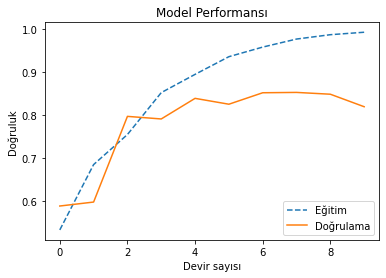

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], '--')
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir sayısı")
plt.legend(['Eğitim', 'Doğrulama'], loc = 'lower right')
plt.show()

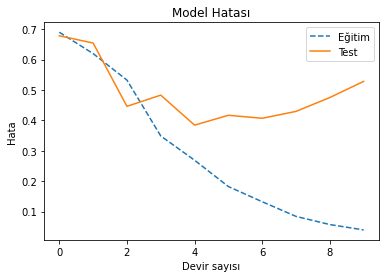

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], '--')
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir sayısı")
plt.legend(['Eğitim', 'Test'], loc = 'upper right')
plt.show()

In [32]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin Doğruluğu : %.2f%%" % (performans[1]*100))

Modelin Doğruluğu : 81.71%


In [33]:
#Long-Short Term Memory

In [39]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, LSTM
from keras.preprocessing import sequence

In [40]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [41]:
print(X_train.shape)

(25000,)


In [42]:
maxlen = 500
X_train = sequence.pad_sequences(X_train, maxlen = 500)
X_test = sequence.pad_sequences(X_test, maxlen = 500)
print("Eğitim kümesinin son hali : \n", X_train)

Eğitim kümesinin son hali : 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [43]:
X_train.shape

(25000, 500)

In [44]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(LSTM(64))
model.add(Dense(1,activation = 'sigmoid'))

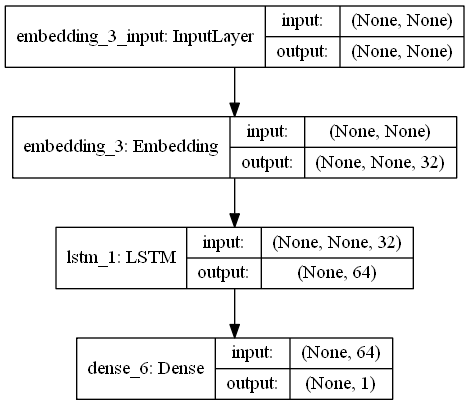

In [46]:
import tensorflow as tf
tf.keras.utils.plot_model(model, "RNN-LSTM-AIGroup9.png", show_shapes = True, show_layer_names = True)

In [47]:
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

In [48]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 184,897
Trainable params: 184,897
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 135s 7ms/step - loss: 0.6553 - accuracy: 0.6162 - val_loss: 0.5555 - val_accuracy: 0.7178
Epoch 2/10
20000/20000 [==============================] - 145s 7ms/step - loss: 0.4497 - accuracy: 0.8104 - val_loss: 0.4169 - val_accuracy: 0.8076
Epoch 3/10
20000/20000 [==============================] - 157s 8ms/step - loss: 0.3178 - accuracy: 0.8698 - val_loss: 0.3293 - val_accuracy: 0.8646
Epoch 4/10
20000/20000 [==============================] - 179s 9ms/step - loss: 0.2437 - accuracy: 0.9089 - val_loss: 0.3186 - val_accuracy: 0.8712
Epoch 5/10
20000/20000 [==============================] - 198s 10ms/step - loss: 0.2125 - accuracy: 0.9226 - val_loss: 0.3211 - val_accuracy: 0.8798
Epoch 6/10
20000/20000 [==============================] - 204s 10ms/step - loss: 0.1846 - accuracy: 0.9352 - val_loss: 0.2988 - val_accuracy: 0.8812
Epoch 7/10
20000/20000 [==============================] - 220

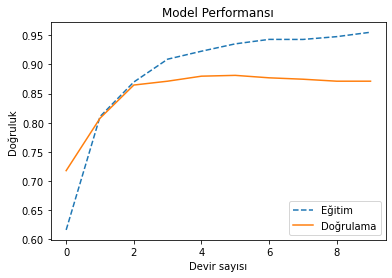

In [50]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], '--')
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir sayısı")
plt.legend(['Eğitim', 'Doğrulama'], loc = 'lower right')
plt.show()

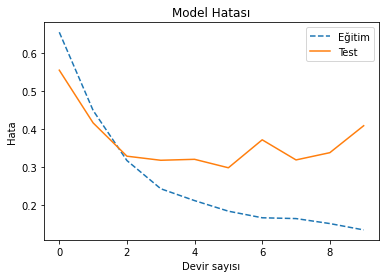

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], '--')
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir sayısı")
plt.legend(['Eğitim', 'Test'], loc = 'upper right')
plt.show()

In [52]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin Doğruluğu : %.2f%%" % (performans[1]*100))

Modelin Doğruluğu : 86.16%
